In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal as norm
import pandas as pd
import cv2
import numpy as np
import keras as keras
from keras.layers import Dense,Dropout, BatchNormalization,Input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-10-27 09:59:43.854883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
file_data_b_csv=r'/home/jacobo15defrutos/AVS9/5-Pruebas/total_imgs.csv'
df= pd.read_csv(file_data_b_csv)
df_train, df_test = train_test_split(df, test_size=0.2,random_state=42)
print("Train shape: ",df_train.shape)
print("Test shape: ",df_test.shape)

Train shape:  (268, 2)
Test shape:  (67, 2)


In [3]:
labels_train= df_train['Label']
train_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/5-Pruebas/Total_images/'
for name in df_train['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img=img.ravel()
    train_list.append(img)
train= np.array(train_list)
train.shape

(268, 50176)

In [43]:
N_COMPONENTS=10
lda=PCA(n_components=N_COMPONENTS,whiten=True)
lda.fit(train)

PCA(n_components=10, whiten=True)

In [44]:
train_SANO_list=[]
train_CMV_list=[]
train_SURV_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/5-Pruebas/Total_images/'
for name in df['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img=img.ravel()
    if 'SANO' in name:
        train_SANO_list.append(img)
    elif 'CMV' in name:
        train_CMV_list.append(img)
    elif 'SURV' in name:
        train_SURV_list.append(img)
train_SANO= np.array(train_SANO_list)
train_CMV= np.array(train_CMV_list)
train_SURV= np.array(train_SURV_list)
train_SURV.shape

(92, 50176)

In [45]:
labels_test= df_test['Label']
test_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/5-Pruebas/Total_images/'
for name in df_test['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img_dense = img.ravel()
    test_list.append(img_dense)
test= np.array(test_list)
test.shape

(67, 50176)

In [46]:
test_SANO_list=[]
test_CMV_list=[]
test_SURV_list=[]
target_size = (224, 224)
folder= '/home/jacobo15defrutos/AVS9/5-Pruebas/Total_images/'
for name in df_test['Name']:
    path= folder + name
    img=cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img,target_size)
    img=img.ravel()
    if 'SANO' in name:
        test_SANO_list.append(img)
    elif 'CMV' in name:
        test_CMV_list.append(img)
    elif 'SURV' in name:
        test_SURV_list.append(img)
test_SANO= np.array(test_SANO_list)
test_CMV= np.array(test_CMV_list)
test_SURV= np.array(test_SURV_list)
label_test_sano=0*np.ones(len(test_SANO))
label_test_cmv=1*np.ones(len(test_CMV))
label_test_surv=2*np.ones(len(test_SURV))

In [47]:
x_train=lda.transform(train)
x_test=lda.transform(test)
x_train.shape

(268, 10)

In [48]:
mlp = keras.models.Sequential()
mlp.add(Input(shape=(N_COMPONENTS,)))
mlp.add(Dense(10, activation='relu'))
#mlp.add(BatchNormalization())
mlp.add(Dense(5, activation='relu'))
#mlp.add(BatchNormalization())
mlp.add(Dense(3, activation='softmax'))
print(mlp.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 5)                 55        
                                                                 
 dense_10 (Dense)            (None, 3)                 18        
                                                                 
Total params: 183
Trainable params: 183
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
if len(labels_train.shape)==1:
    y_train = keras.utils.to_categorical(labels_train, num_classes=3)
if len(labels_test.shape)==1:
    y_test = keras.utils.to_categorical(labels_test, num_classes=3)

In [50]:
optimizer=keras.optimizers.Adam(learning_rate=1e-3)
mlp.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
h = mlp.fit(x_train, y_train, epochs=100, shuffle=True, batch_size=25,validation_split=0.15, verbose=1)

Epoch 1/100


10/10 [==============================] - 1s 28ms/step - loss: 1.1204 - accuracy: 0.2952 - val_loss: 1.1298 - val_accuracy: 0.4146
Epoch 2/100
10/10 [==============================] - 0s 12ms/step - loss: 1.1111 - accuracy: 0.3921 - val_loss: 1.1243 - val_accuracy: 0.3902
Epoch 3/100
10/10 [==============================] - 0s 14ms/step - loss: 1.1036 - accuracy: 0.4405 - val_loss: 1.1204 - val_accuracy: 0.4146
Epoch 4/100
10/10 [==============================] - 0s 14ms/step - loss: 1.0967 - accuracy: 0.4361 - val_loss: 1.1176 - val_accuracy: 0.4146
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 1.0903 - accuracy: 0.4537 - val_loss: 1.1151 - val_accuracy: 0.4390
Epoch 6/100
10/10 [==============================] - 0s 10ms/step - loss: 1.0851 - accuracy: 0.4626 - val_loss: 1.1123 - val_accuracy: 0.4390
Epoch 7/100
10/10 [==============================] - 0s 11ms/step - loss: 1.0799 - accuracy: 0.4714 - val_loss: 1.1088 - val_accuracy: 0.4634
Epoch 8/100
10/10 [

train acc: 57.71 % 
val acc: 39.02 %


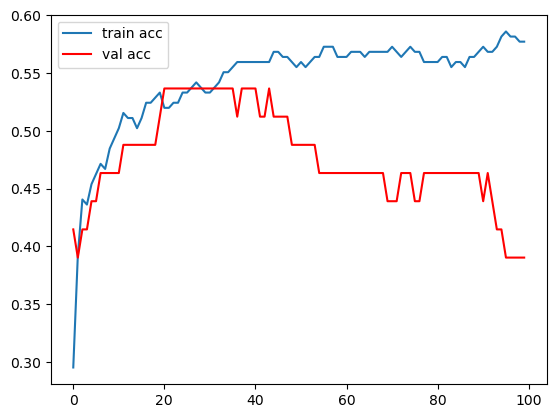

In [51]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(h.history['accuracy'][-1]*100,h.history['val_accuracy'][-1]*100))

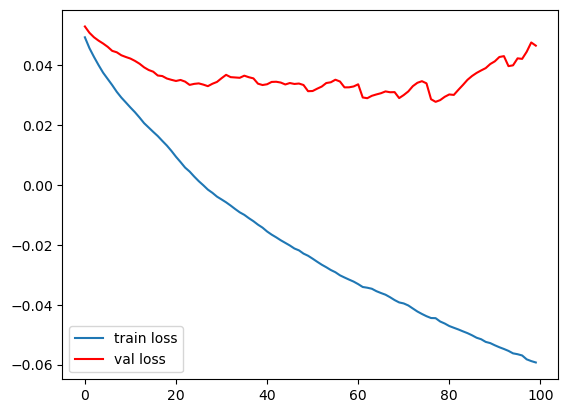

In [52]:
plt.plot(np.log10(h.history['loss']))
plt.plot(np.log10(h.history['val_loss']), 'r')
plt.legend(['train loss', 'val loss'])

In [53]:
from sklearn.metrics import accuracy_score
pred= np.argmax(mlp.predict(x_test),axis=1)
acc_total=mlp.evaluate(x_test,y_test)[1]
#acc_total= accuracy_score(labels_test,pred)
print("Total Accuracy: ",acc_total*100,"%")
pred

3/3 [==============================] - 0s 9ms/step - loss: 1.3227 - accuracy: 0.3134
Total Accuracy:  31.343284249305725 %


array([0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2,
       1])

### Calculate each class accuracy

In [54]:
acc_sano = np.sum(pred[labels_test == 0] == 0)/len(label_test_sano) * 100
acc_cmv = np.sum(pred[labels_test == 1] == 1)/len(label_test_cmv) * 100
acc_surv = np.sum(pred[labels_test == 2] == 2)/len(label_test_surv) * 100
print("Class SANO Accuracy: {:.2f} %".format(acc_sano))
print("Class CMV Accuracy: {:.2f} %".format(acc_cmv))
print("Class SURV Accuracy: {:.2f} %".format(acc_surv))

Class SANO Accuracy: 66.67 %
Class CMV Accuracy: 11.54 %
Class SURV Accuracy: 11.76 %
